In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

# 1. Load the dataset into python environment

In [98]:
titanic=pd.read_csv('titanic_dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [99]:
titanic.set_index('PassengerId', inplace=True)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [100]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [101]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [102]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [103]:
#Checking normality of age

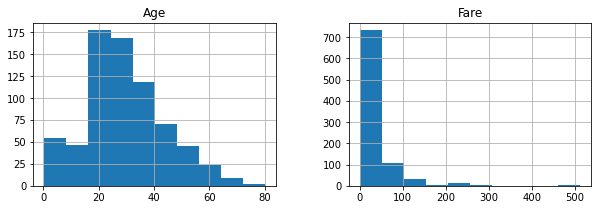

In [104]:
freqgraph = titanic.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,3))
plt.show()

In [105]:
#Since it is right-skewed, we fill the missing vaues with median

In [106]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [107]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [108]:
#Since Cabin and Embarked columns are not numerical, fill the missing values with mode

In [109]:
for i in ['Cabin', 'Embarked']:
    titanic[i]=titanic[i].fillna(titanic[i].mode()[0])
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [110]:
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

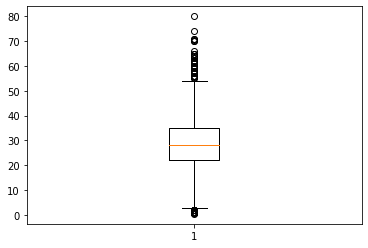

In [111]:
plt.boxplot(titanic['Age'])
plt.show()

In [112]:
#There are ouliers in Age

In [113]:
Q1 = np.percentile(titanic['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(titanic['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(titanic['Age'],75,interpolation = 'midpoint')

IQR = Q3-Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,low_lim)
print("Upper Limit is",up_lim)

IQR is  13.0
Lower limit is 2.5
Upper Limit is 54.5


In [114]:
outlier = []
for x in titanic['Age']:
    if ((x < low_lim) or (x > up_lim)):
        outlier.append(x)
print("Outlier values are",outlier)

Outlier values are [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [115]:
len(outlier)

66

In [134]:
for i in outlier:
    titanic.drop(titanic.loc[titanic['Age']==i].index, inplace=True)

In [135]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  825 non-null    float64
 1   Pclass    825 non-null    int64  
 2   Name      825 non-null    object 
 3   Sex       825 non-null    object 
 4   Age       825 non-null    float64
 5   SibSp     825 non-null    int64  
 6   Parch     825 non-null    int64  
 7   Ticket    825 non-null    object 
 8   Fare      825 non-null    float64
 9   Cabin     825 non-null    object 
 10  Embarked  825 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 109.6+ KB


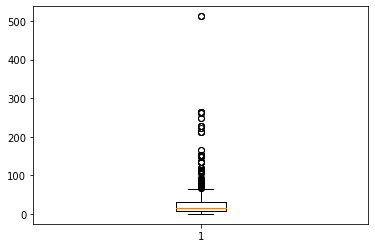

In [117]:
plt.boxplot(titanic['Fare'])
plt.show()

In [118]:
#There are outliers in Fare column

In [119]:
Q1 = np.percentile(titanic['Fare'],25,interpolation = 'midpoint')
Q2 = np.percentile(titanic['Fare'],50,interpolation = 'midpoint')
Q3 = np.percentile(titanic['Fare'],75,interpolation = 'midpoint')

IQR = Q3-Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,low_lim)
print("Upper Limit is",up_lim)

IQR is  23.0896
Lower limit is -26.724
Upper Limit is 65.6344


In [120]:
outlier2 = []
for x in titanic['Fare']:
    if ((x < low_lim) or (x > up_lim)):
        outlier2.append(x)
print("Outlier values are",outlier2)

Outlier values are [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [121]:
len(outlier2)

116

In [136]:
for i in outlier2:
    titanic.drop(titanic.loc[titanic['Fare']==i].index, inplace=True)

In [137]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  721 non-null    float64
 1   Pclass    721 non-null    int64  
 2   Name      721 non-null    object 
 3   Sex       721 non-null    object 
 4   Age       721 non-null    float64
 5   SibSp     721 non-null    int64  
 6   Parch     721 non-null    int64  
 7   Ticket    721 non-null    object 
 8   Fare      721 non-null    float64
 9   Cabin     721 non-null    object 
 10  Embarked  721 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 83.8+ KB


In [138]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.337032,2.509015,28.094313,0.414702,0.323162,17.389845
std,0.473024,0.717046,10.021961,0.853916,0.788549,13.563036
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,12.275000
75%,1.000000,3.000000,33.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,65.000000


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [153]:
X=titanic.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)

In [154]:
X.describe()

,0,1,2,3,4,5
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.337032,0.754508,0.492045,0.082940,0.053860,0.267536
std,0.473024,0.358523,0.196509,0.170783,0.131425,0.208662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.372549,0.000000,0.000000,0.121474
50%,0.000000,1.000000,0.490196,0.000000,0.000000,0.188846
75%,1.000000,1.000000,0.588235,0.200000,0.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
